<a href="https://colab.research.google.com/github/mojo46/Smart_Parking/blob/master/Smart_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognize Numberplate Image 

In [0]:
# Imports 
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from os.path import exists, join, basename, splitext
from imutils import paths

Number-Plate image Data preparation

In [0]:
# unzip a zip file
# import os
cwd = os.getcwd()
def unzip_a_zip(file_path, dest_dir=cwd):
  from zipfile import ZipFile
  with ZipFile(file_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(dest_dir)

In [0]:
unzip_a_zip("/content/drive/My Drive/Smart_Parking/character segmentation/cropped_NP2.zip","/content")

In [3]:
# number of images in the folder
!ls /content/cropped_NP2 | wc -l

7534


In [0]:
#List images paths
# from imutils import paths
imagelist = sorted(paths.list_images("/content/cropped_NP2"))
imagelist

In [0]:
# Display image 
def display_image(img1):
  print("image : ", img1)
  plt.imshow(matplotlib.image.imread(img1))

In [0]:
# Sub set of images 10 images
sublistpath = imagelist[:10]
sublistpath
img1path = imagelist[10]

image :  /content/cropped_NP2/1010.jpg


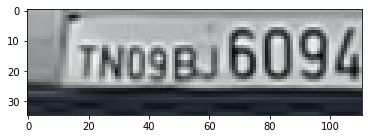

In [7]:
display_image(img1path)

In [0]:
## save the image onto a file 

img1 =  cv2.imread(img1path)
cv2.imwrite('/content/pic.jpg', img1)


# Segmenting the image

In [0]:
!cat "/content/drive/My Drive/Smart_Parking/character segmentation/character_seg.py"

In [0]:
!pip install pytesseract

In [0]:
## segment a image 

from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import imutils
import numpy as np
from imutils import paths
image_counter = 0
from google.colab.patches import cv2_imshow

# Load the model we trained
# load the example image and convert it to grayscale

image = cv2.imread('/content/pic.jpg')	
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# edged=cv2.Canny(gray,30,200)
# cv2.imshow('canny edges',edged)
blur = cv2.GaussianBlur(gray,(3,3), 0)
thresh = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
bitwise = cv2.bitwise_not(thresh)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(bitwise, cv2.MORPH_OPEN, kernel)
# cv2.imshow("bitwise",opening)
cv2.waitKey(0)
clone=image.copy()
cnts=cv2.findContours(opening,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)	

print(len(cnts))

for (i, c) in enumerate(cnts):
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
  crop = gray[y:y + h, x:x + w]
  crop = cv2.resize(crop, (64, 64)) 
  # print(crop,"\n\n")
  cv2_imshow(crop)
  image_name = str(image_counter)+".jpg"
  image_path = "output/"+image_name
  cv2.imwrite(image_path,crop)
  image_counter+=1

  print("image counter :",image_counter)
  # construct a mask by drawing only the current contour
  #mask = np.zeros(gray.shape, dtype="uint8")
  #cv2.drawContours(mask, [c], -1, 255, -1) 
  # show the images
  #cv2.imshow("Image", image)
  #cv2.imshow("Mask", mask)
  #cv2.imshow("Image + Mask", cv2.bitwise_and(image, image, mask=mask))
  #cv2.waitKey(0)
#cv2.drawContours(image, cnts, -1, (0, 255, 0), 2)
#cv2.imshow('canny edges after contouring', edged)
# cv2.imshow('contours',clone)
cv2.waitKey(0)


In [0]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

# To install from PyPi
!pip install keras-ocr

In [8]:
import tensorflow as tf

print(tf.__version__)


1.15.0


In [0]:
import matplotlib.pyplot as plt

import keras_ocr

In [0]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/e/e8/FseeG2QeLXo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [0]:
url = 'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg'

imgurl = keras_ocr.tools.read(url)

In [17]:
print(imgurl.shape)

(2212, 2400, 3)


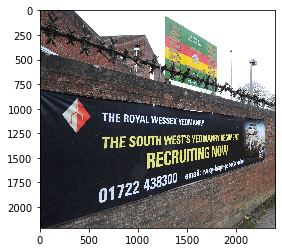

In [22]:
plt.imshow(imgurl)

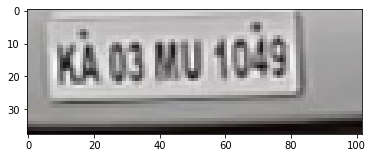

In [28]:
plt.imshow(cv2.imread(imgpath))

In [26]:
imgpath= '/content/cropped_NP2/3000.jpg'

image100 = cv2.imread(imgpath)


print(image100.shape)

(38, 102, 3)


In [27]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    cv2.imread(imgpath)
    
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

print(prediction_groups)

# # Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
# for ax, image, predictions in zip(axs, images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
[[('109', array([[54.,  4.],
       [84.,  4.],
       [84., 23.],
       [54., 23.]], dtype=float32)), ('ka', array([[ 6.,  7.],
       [24.,  7.],
       [24., 26.],
       [ 6., 26.]], dtype=float32)), ('ku', array([[37.,  7.],
       [56.,  7.],
       [56., 24.],
       [37., 24.]], dtype=float32)), ('o', array([[23.,  9.],
       [38.,  9.],
       [38., 24.],
       [23., 24.]], dtype=float32))]]


## OPENCV3_OCR

In [29]:
!git clone https://github.com/MicrocontrollersAndMore/OpenCV_3_KNN_Character_Recognition_Python.git

Cloning into 'OpenCV_3_KNN_Character_Recognition_Python'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [31]:
!cat /content/OpenCV_3_KNN_Character_Recognition_Python/GenData.py

# GenData.py

import sys
import numpy as np
import cv2
import os

# module level variables ##########################################################################
MIN_CONTOUR_AREA = 100

RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

###################################################################################################
def main():
    imgTrainingNumbers = cv2.imread("training_chars.png")            # read in training numbers image

    if imgTrainingNumbers is None:                          # if image was not read successfully
        print "error: image not read from file \n\n"        # print error message to std out
        os.system("pause")                                  # pause so user can see error message
        return                                              # and exit function (which exits program)
    # end if

    imgGray = cv2.cvtColor(imgTrainingNumbers, cv2.COLOR_BGR2GRAY)          # get grayscale image
    imgBlurred = cv2.GaussianBlur(imgGray